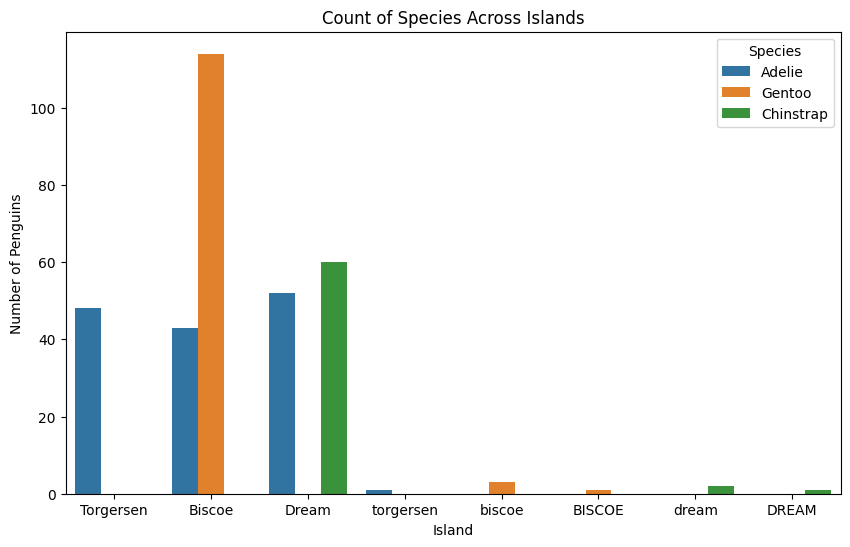

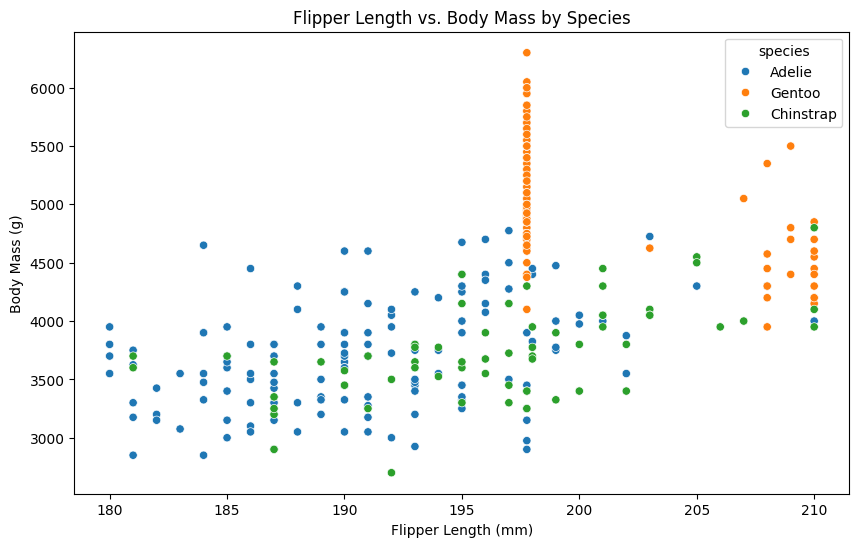

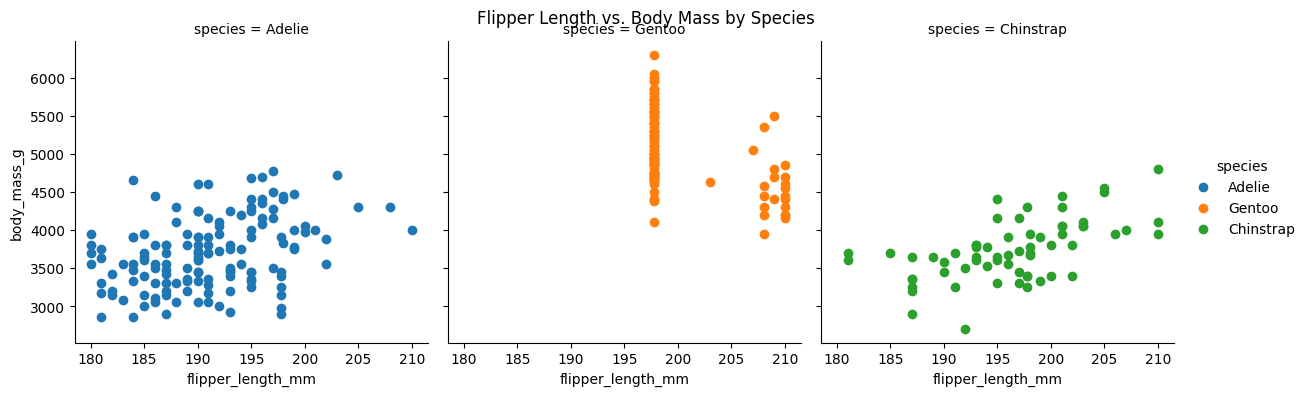

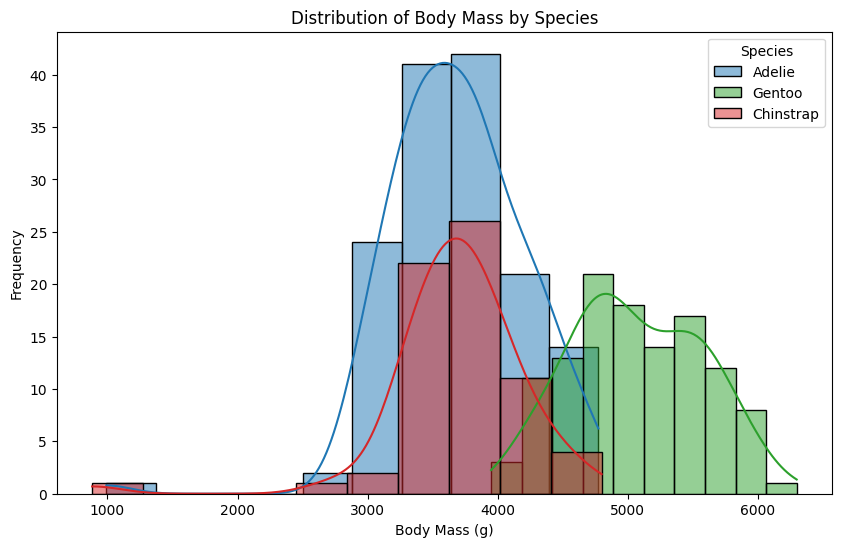

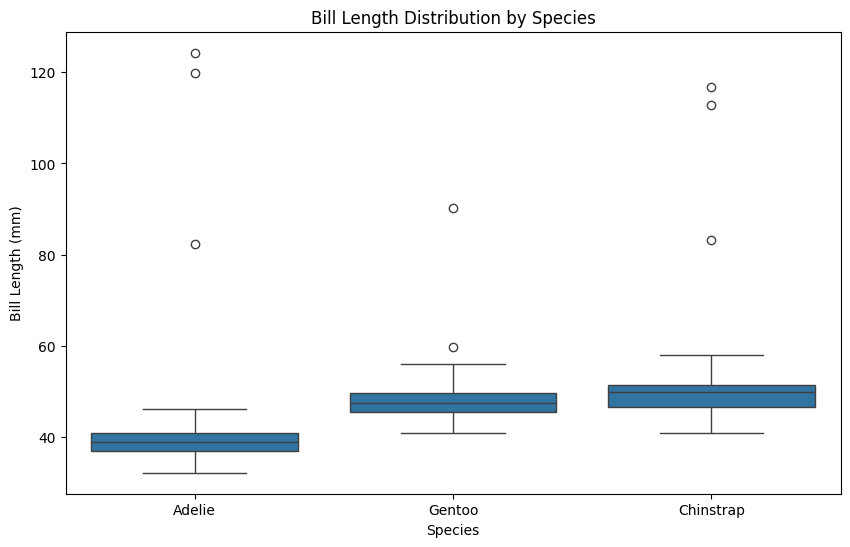

(  species     island  calorie requirement  average sleep duration  \
 0  Adelie  Torgersen                 6563                      11   
 1  Adelie  Torgersen                 4890                      14   
 2  Adelie  Torgersen                 7184                      11   
 3  Adelie  Torgersen                 4169                       8   
 4  Adelie  Torgersen                 4774                       8   
 
    bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  gender  \
 0        0.075922       0.049054           0.033333     0.529347    male   
 1        0.080260       0.037666           0.200000     0.538575  female   
 2        0.088937       0.042922           0.500000     0.437062  female   
 3             NaN            NaN                NaN     0.020303     NaN   
 4        0.049892       0.054310           0.433333     0.473976  female   
 
      year       BMI  Adelie  NaN  Gentoo  Chinstrap  
 0  2007.0  5.128766       1    0       0          0  
 1  

In [15]:
# Part 1: Data Analysis & Preprocessing [10 Points]

# 1 Importing necessary libraries
import pandas as pd

# 2 Load dataset - penguins.csv
penguins_df = pd.read_csv('/content/penguins.csv')

# Handling missing values by filling them with the mean for numeric columns
penguins_df['bill_length_mm'].fillna(penguins_df['bill_length_mm'].mean())
penguins_df['bill_depth_mm'].fillna(penguins_df['bill_depth_mm'].mean())
penguins_df['flipper_length_mm'].fillna(penguins_df['flipper_length_mm'].mean())
penguins_df['body_mass_g'].fillna(penguins_df['body_mass_g'].mean())

# 3 Handling categorical missing values by filling with mode
penguins_df['gender'].fillna(penguins_df['gender'].mode()[0])

# Data transformation: Adding a new column for BMI (Body Mass Index) estimation for penguins
penguins_df['BMI'] = penguins_df['body_mass_g'] / (penguins_df['bill_length_mm'] * penguins_df['bill_depth_mm'])

# 4  Handle mismatched string formats
penguins_df['species'] = penguins_df['species'].str.capitalize()

# 5 Handle outliers. Detect and manage outliers within the dataset
penguins_clean = penguins_df[(penguins_df['flipper_length_mm'] >= 180) & (penguins_df['flipper_length_mm'] <= 210)]
flipper_mean = penguins_df['flipper_length_mm'].mean()
penguins_df.loc[(penguins_df['flipper_length_mm'] < 180) | (penguins_df['flipper_length_mm'] > 210), 'flipper_length_mm'] = flipper_mean

# 6 y data visualization
# Count Plot
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.countplot(data=penguins_df, x='island', hue='species')
plt.title('Count of Species Across Islands')
plt.ylabel('Number of Penguins')
plt.xlabel('Island')
plt.legend(title='Species')
plt.show()


#Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=penguins_df, x='flipper_length_mm', y='body_mass_g', hue='species')
plt.title('Flipper Length vs. Body Mass by Species')
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Body Mass (g)')
plt.show()

#Facet Grid
g = sns.FacetGrid(penguins_df, col='species', hue='species', height=4)
g.map(plt.scatter, 'flipper_length_mm', 'body_mass_g')
g.add_legend()
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Flipper Length vs. Body Mass by Species')
plt.show()

#Histogram
plt.figure(figsize=(10, 6))
for species in penguins_df['species'].unique():
    subset = penguins_df[penguins_df['species'] == species]
    sns.histplot(subset['body_mass_g'], kde=True, label=species, bins=10)
plt.title('Distribution of Body Mass by Species')
plt.xlabel('Body Mass (g)')
plt.ylabel('Frequency')
plt.legend(title='Species')
plt.show()

#BoxPlot
plt.figure(figsize=(10, 6))
sns.boxplot(data=penguins_df, x='species', y='bill_length_mm')
plt.title('Bill Length Distribution by Species')
plt.ylabel('Bill Length (mm)')
plt.xlabel('Species')
plt.show()

# 8 One-hot encoding for 'Species' column manually
species_unique = penguins_df['species'].unique()
for species in species_unique:
    penguins_df[species] = penguins_df['species'].apply(lambda x: 1 if x == species else 0)

# Normalizing 'flipper_length_mm' column manually
min_value_1 = penguins_df['flipper_length_mm'].min()
max_value_1 = penguins_df['flipper_length_mm'].max()
penguins_df['flipper_length_mm'] = (penguins_df['flipper_length_mm'] - min_value_1) / (max_value_1 - min_value_1)

# Normalizing 'bill_length_mm' column manually
min_value_2 = penguins_df['bill_length_mm'].min()
max_value_2 = penguins_df['bill_length_mm'].max()
penguins_df['bill_length_mm'] = (penguins_df['bill_length_mm'] - min_value_2) / (max_value_2 - min_value_2)

# Normalizing 'bill_depth_mm' column manually
min_value_3 = penguins_df['bill_depth_mm'].min()
max_value_3 = penguins_df['bill_depth_mm'].max()
penguins_df['bill_depth_mm'] = (penguins_df['bill_depth_mm'] - min_value_3) / (max_value_3 - min_value_3)

# Normalizing 'body_mass_g' column manually
min_value_4 = penguins_df['body_mass_g'].min()
max_value_4 = penguins_df['body_mass_g'].max()
penguins_df['body_mass_g'] = (penguins_df['body_mass_g'] - min_value_4) / (max_value_4 - min_value_4)

# Summary statistics after preprocessing
penguins_summary = penguins_df.describe()

# Show the cleaned dataset head and summary
penguins_df.head(), penguins_summary

In [4]:
# Part 2: Data Cleaning & Analysis on Other Datasets [10 Points]

# Load dataset - diamond.csv
diamond_df = pd.read_csv('/content/diamond.csv')

# Dropping unnecessary column 'Unnamed: 0'
diamond_df = diamond_df.drop(columns=['Unnamed: 0'])

# Ensure 'carat', 'depth', and 'table' columns are of type float
diamond_df['carat'] = pd.to_numeric(diamond_df['carat'], errors='coerce')
diamond_df['depth'] = pd.to_numeric(diamond_df['depth'], errors='coerce')
diamond_df['table'] = pd.to_numeric(diamond_df['table'], errors='coerce')

# Handling missing values in numeric columns by using mean
diamond_df['carat'].fillna(diamond_df['carat'].mean(), inplace=True)
diamond_df['depth'].fillna(diamond_df['depth'].mean(), inplace=True)
diamond_df['table'].fillna(diamond_df['table'].mean(), inplace=True)


# Handling categorical missing values by using mode
diamond_df['cut'].fillna(diamond_df['cut'].mode()[0], inplace=True)
diamond_df['color'].fillna(diamond_df['color'].mode()[0], inplace=True)

# Summary statistics after cleaning
diamond_summary = diamond_df.describe()

# Load dataset - breeding_bird_atlas.csv
bird_df = pd.read_csv('/content/breeding_bird_atlas.csv')

# Dropping unnecessary columns
bird_df = bird_df.drop(columns=['Map Link', 'Family Name', 'Family Description', 'Average UB Student GPA'])

# Handling missing values in 'Temperature' by filling with mean
bird_df['Temperature'].fillna(bird_df['Temperature'].mean(), inplace=True)

# Data transformation: Adding a new column to indicate if bird sighting occurred in a Federal Protected Area
bird_df['Protected Area Sighting'] = bird_df['NYS Protection Status'].apply(lambda x: 'Yes' if x == 'Protected' else 'No')

# Summary statistics for bird dataset
bird_summary = bird_df.describe()

# Showing cleaned data head for diamond and bird datasets, along with their summaries
diamond_df.head(), diamond_summary, bird_df.head(), bird_summary


(   carat      cut color clarity  average us salary  \
 0   0.23    Ideal     E     SI2              31282   
 1   0.21  Premium     E     SI1              40049   
 2   0.23     Good     E     VS1              33517   
 3   0.29  Premium     I     VS2              38495   
 4   0.31     Good     J     SI2              34178   
 
    number of diamonds mined (millions)  depth  table price     x     y     z  
 0                                 5.01   61.5   55.0   326  3.95  3.98  2.43  
 1                                 1.69   59.8   61.0   326  3.89  3.84  2.31  
 2                                 3.85   56.9   65.0   327  4.05  4.07  2.31  
 3                                 3.49   62.4   58.0   334   4.2  4.23  2.63  
 4                                 4.70   63.3   58.0   335  4.34  4.35  2.75  ,
               carat  average us salary  number of diamonds mined (millions)  \
 count  53940.000000       53940.000000                         53940.000000   
 mean       0.797823       